In [2]:
cd ~/microbiome_rnn/

/Volumes/export/isn/mwiest/microbiome_rnn


In [166]:
from __future__ import print_function
import os
import torch
import numpy as np
import pandas as pd
import sys
from otu_handler import OTUHandler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from scipy.stats.mstats import zscore
import matplotlib.gridspec as gridspec


In [17]:
def complete_and_multiindex_df(df):
    default_tax = ['k__', 'p__', 'c__', 'o__', 'f__', 'g__', 's__']
    s = list(df.index.values)
    lt = [list(ls.split(';')) for ls in s]
    for l in lt:
        if len(l) < len(default_tax):
            l += default_tax[-(len(default_tax)-len(l)):]

    ltn = pd.DataFrame(np.array(lt))
    ltn.index = df.index
    ltn.columns = default_tax
    combined = pd.concat((df, ltn), axis=1)
    combined.set_index(default_tax, inplace=True)
    return combined


In [9]:
input_dir = 'just_rob_knight2/'
files = [os.path.join(input_dir, f) for f in os.listdir(input_dir)]
oh = OTUHandler(files)

In [203]:
# Get color labels so that we can color the points based on taxonomy.
tax_levels = 3
split_char = ';'
join_char = '\n'
labs = [join_char.join(c.split(split_char)[1:tax_levels]) for c in oh.samples[0].index.values]
unique_labs = list(set(labs))
unique_ints = list(range(len(unique_labs)))
unique_int_lookup = dict(zip(unique_labs, unique_ints))
labs_to_ints = [unique_int_lookup[l] for l in labs]
print('There are {} distinct groups'.format(num_colors))


There are 16 distinct groups


In [204]:
# Now define the colormap
num_colors = len(list(set(labs)))
cmap = plt.cm.get_cmap('tab20', num_colors)
colors = cmap(np.linspace(0, 1, num_colors))
color_lookup = dict(zip(unique_labs, colors))
colors_to_plot = [color_lookup[l] for l in labs]

# Perform PCA Across Time

Text(0.5,1.005,'PCA Performed Across Time For Samples')

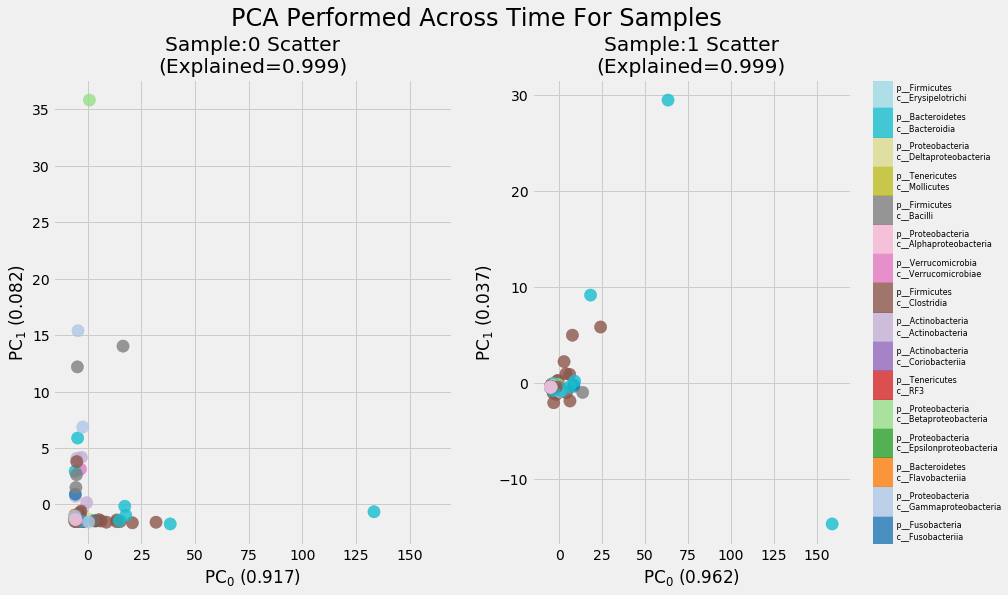

In [218]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8), sharex=True, sharey=False)
for i, s in enumerate(oh.samples):
    zs = zscore(s.values, axis=0)
    pca = PCA(n_components=2)
    pca.fit(zs)
    t = pca.transform(zs)
    sc = ax[i].scatter(t[:, 0], t[:, 1], c=labs_to_ints, cmap=cmap, s=150, alpha=0.8)
    ax[i].set_title('Sample:{} Scatter\n(Explained={})'.format(i, 
                                                               str(sum(pca.explained_variance_ratio_[:2]))[:5]
                                                              ))
    ax[i].set_xlabel('PC$_0$ ({})'.format(str(pca.explained_variance_ratio_[0])[:5]))
    ax[i].set_ylabel('PC$_1$ ({})'.format(str(pca.explained_variance_ratio_[1])[:5]))
cb = plt.colorbar(sc, ax=ax[i])
cb.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(unique_labs):
    cb.ax.text(1, (2 * j + 1) / 32.0, lab, ha='left', va='center', fontsize=8)
plt.suptitle('PCA Performed Across Time For Samples', fontsize=24, y=1.005)

Text(0.5,1.005,'PCA Performed Across Samples')

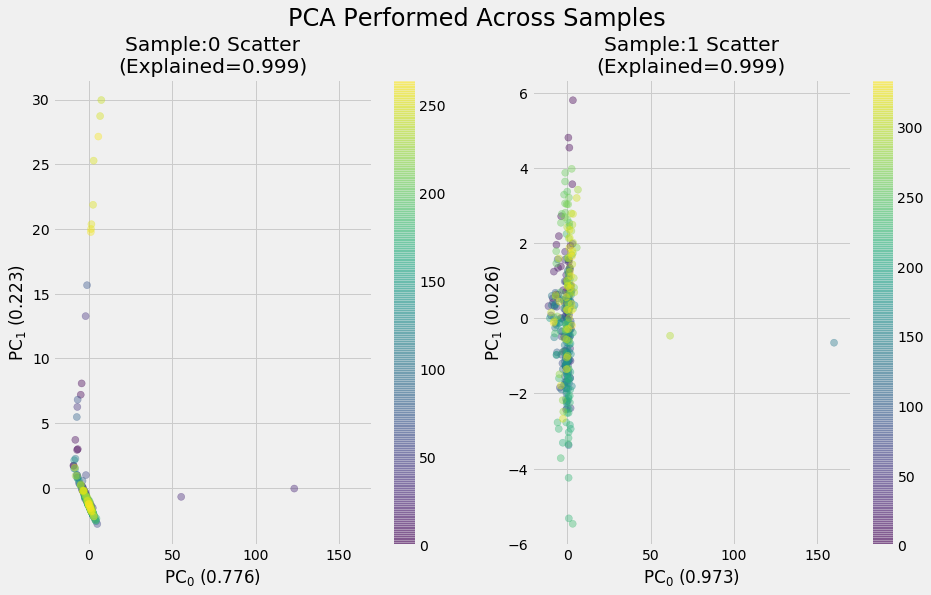

In [236]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8), sharex=True, sharey=False)
for i, s in enumerate(oh.samples):
    zs = zscore(s.values, axis=1).T
    pca = PCA(n_components=2)
    pca.fit(zs)
    t = pca.transform(zs)
    sc = ax[i].scatter(t[:, 0], t[:, 1], c=range(t.shape[0]), cmap='viridis', s=50, alpha=0.4)
    ax[i].set_title('Sample:{} Scatter\n(Explained={})'.format(i, 
                                                               str(sum(pca.explained_variance_ratio_[:2]))[:5]
                                                              ))
    ax[i].set_xlabel('PC$_0$ ({})'.format(str(pca.explained_variance_ratio_[0])[:5]))
    ax[i].set_ylabel('PC$_1$ ({})'.format(str(pca.explained_variance_ratio_[1])[:5]))
    cb = plt.colorbar(sc, ax=ax[i])
plt.suptitle('PCA Performed Across Samples', fontsize=24, y=1.005)

In [21]:
comp = complete_and_multiindex_df(oh.samples[0])

Index([u'k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__[Ruminococcus]; s__gnavus',
       u'k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Clostridiaceae; g__Clostridium; s__',
       u'k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Actinomycetaceae; g__Actinomyces; s__',
       u'k__Bacteria; p__Verrucomicrobia; c__Verrucomicrobiae; o__Verrucomicrobiales; f__Verrucomicrobiaceae; g__Akkermansia; s__muciniphila',
       u'k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__Lachnospira; s__',
       u'k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Bacteroidaceae; g__Bacteroides; s__fragilis',
       u'k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Prevotellaceae; g__Prevotella; s__melaninogenica',
       u'k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Clostridiaceae',
       u'k__Bacteria; p__Firmicutes; c__Clostridi

In [31]:
comp.index.apply(hf)

AttributeError: 'MultiIndex' object has no attribute 'apply'

In [35]:
len(list(set([';'.join(c[:4]) for c in comp.index])))

23

In [42]:
oh.samples[0].index.values[0].split(';')

['k__Bacteria',
 ' p__Firmicutes',
 ' c__Clostridia',
 ' o__Clostridiales',
 ' f__Lachnospiraceae',
 ' g__[Ruminococcus]',
 ' s__gnavus']

In [88]:
labs

['k__Bacteria; p__Firmicutes; c__Clostridia',
 'k__Bacteria; p__Firmicutes; c__Clostridia',
 'k__Bacteria; p__Actinobacteria; c__Actinobacteria',
 'k__Bacteria; p__Verrucomicrobia; c__Verrucomicrobiae',
 'k__Bacteria; p__Firmicutes; c__Clostridia',
 'k__Bacteria; p__Bacteroidetes; c__Bacteroidia',
 'k__Bacteria; p__Bacteroidetes; c__Bacteroidia',
 'k__Bacteria; p__Firmicutes; c__Clostridia',
 'k__Bacteria; p__Firmicutes; c__Clostridia',
 'k__Bacteria; p__Firmicutes; c__Clostridia',
 'k__Bacteria; p__Bacteroidetes; c__Bacteroidia',
 'k__Bacteria; p__Actinobacteria; c__Coriobacteriia',
 'k__Bacteria; p__Tenericutes; c__RF3',
 'k__Bacteria; p__Firmicutes; c__Clostridia',
 'k__Bacteria; p__Firmicutes; c__Clostridia',
 'k__Bacteria; p__Tenericutes; c__Mollicutes',
 'k__Bacteria; p__Firmicutes; c__Clostridia',
 'k__Bacteria; p__Firmicutes; c__Clostridia',
 'k__Bacteria; p__Firmicutes; c__Clostridia',
 'k__Bacteria; p__Firmicutes; c__Clostridia',
 'k__Bacteria; p__Firmicutes; c__Clostridia',
